In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#!pip install sklearn

from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.isnull().sum()
train_data=train_data.dropna(axis=0)
test_data=test_data.dropna(axis=0)
test_data.isnull().sum()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             225493 non-null  int64  
 1   disbursed_amount                     225493 non-null  int64  
 2   asset_cost                           225493 non-null  int64  
 3   ltv                                  225493 non-null  float64
 4   branch_id                            225493 non-null  int64  
 5   supplier_id                          225493 non-null  int64  
 6   manufacturer_id                      225493 non-null  int64  
 7   Current_pincode_ID                   225493 non-null  int64  
 8   Date.of.Birth                        225493 non-null  int64  
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        225493 non-null  int64  
 11  State_ID     

In [3]:
train_data=train_data.drop(['UniqueID'],axis=1)
test_data=test_data.drop(['UniqueID'],axis=1)
train_data=train_data.drop(['SEC.NO.OF.ACCTS'],axis=1)
test_data=test_data.drop(['SEC.NO.OF.ACCTS'],axis=1)
train_data=train_data.drop(['SEC.ACTIVE.ACCTS'],axis=1)
test_data=test_data.drop(['SEC.ACTIVE.ACCTS'],axis=1)
train_data=train_data.drop(['SEC.OVERDUE.ACCTS'],axis=1)
test_data=test_data.drop(['SEC.OVERDUE.ACCTS'],axis=1)
train_data=train_data.drop(['SEC.CURRENT.BALANCE'],axis=1)
test_data=test_data.drop(['SEC.CURRENT.BALANCE'],axis=1)
train_data=train_data.drop(['SEC.SANCTIONED.AMOUNT'],axis=1)
test_data=test_data.drop(['SEC.SANCTIONED.AMOUNT'],axis=1)
train_data=train_data.drop(['SEC.DISBURSED.AMOUNT'],axis=1)
test_data=test_data.drop(['SEC.DISBURSED.AMOUNT'],axis=1)
train_data=train_data.drop(['MobileNo_Avl_Flag'],axis=1)
test_data=test_data.drop(['MobileNo_Avl_Flag'],axis=1)
train_data=train_data.drop(['Aadhar_flag'],axis=1)
test_data=test_data.drop(['Aadhar_flag'],axis=1)
train_data=train_data.drop(['PAN_flag'],axis=1)
test_data=test_data.drop(['PAN_flag'],axis=1)
train_data=train_data.drop(['VoterID_flag'],axis=1)
test_data=test_data.drop(['VoterID_flag'],axis=1)
train_data=train_data.drop(['Driving_flag'],axis=1)
test_data=test_data.drop(['Driving_flag'],axis=1)
train_data=train_data.drop(['Passport_flag'],axis=1)
test_data=test_data.drop(['Passport_flag'],axis=1)
train_data=train_data.drop(['SEC.INSTAL.AMT'],axis=1)
test_data=test_data.drop(['SEC.INSTAL.AMT'],axis=1)
train_data=train_data.drop(['Employee_code_ID'],axis=1)
test_data=test_data.drop(['Employee_code_ID'],axis=1)
train_data=train_data.drop(['supplier_id'],axis=1)
test_data=test_data.drop(['supplier_id'],axis=1)
train_data=train_data.drop(['manufacturer_id'],axis=1)
test_data=test_data.drop(['manufacturer_id'],axis=1)
train_data=train_data.drop(['Current_pincode_ID'],axis=1)
test_data=test_data.drop(['Current_pincode_ID'],axis=1)
train_data=train_data.drop(['Date.of.Birth'],axis=1)
test_data=test_data.drop(['Date.of.Birth'],axis=1)
train_data=train_data.drop(['DisbursalDate'],axis=1)
test_data=test_data.drop(['DisbursalDate'],axis=1)
train_data=train_data.drop(['PRI.OVERDUE.ACCTS'],axis=1)
test_data=test_data.drop(['PRI.OVERDUE.ACCTS'],axis=1)
train_data=train_data.drop(['PRI.CURRENT.BALANCE'],axis=1)
test_data=test_data.drop(['PRI.CURRENT.BALANCE'],axis=1)
train_data=train_data.drop(['PRI.SANCTIONED.AMOUNT'],axis=1)
test_data=test_data.drop(['PRI.SANCTIONED.AMOUNT'],axis=1)
train_data=train_data.drop(['PRI.DISBURSED.AMOUNT'],axis=1)
test_data=test_data.drop(['PRI.DISBURSED.AMOUNT'],axis=1)
train_data=train_data.drop(['PRIMARY.INSTAL.AMT'],axis=1)
test_data=test_data.drop(['PRIMARY.INSTAL.AMT'],axis=1)
train_data=train_data.drop(['disbursed_amount'],axis=1)
test_data=test_data.drop(['disbursed_amount'],axis=1)
train_data=train_data.drop(['asset_cost'],axis=1)
test_data=test_data.drop(['asset_cost'],axis=1)
train_data=train_data.drop(['PERFORM_CNS.SCORE'],axis=1)
test_data=test_data.drop(['PERFORM_CNS.SCORE'],axis=1)
train_data=train_data.drop(['PRI.NO.OF.ACCTS'],axis=1)
test_data=test_data.drop(['PRI.NO.OF.ACCTS'],axis=1)
train_data=train_data.drop(['PRI.ACTIVE.ACCTS'],axis=1)
test_data=test_data.drop(['PRI.ACTIVE.ACCTS'],axis=1)
train_data=train_data.drop(['NEW.ACCTS.IN.LAST.SIX.MONTHS'],axis=1)
test_data=test_data.drop(['NEW.ACCTS.IN.LAST.SIX.MONTHS'],axis=1)
train_data=train_data.drop(['AVERAGE.ACCT.AGE'],axis=1)
test_data=test_data.drop(['AVERAGE.ACCT.AGE'],axis=1)
train_data=train_data.drop(['CREDIT.HISTORY.LENGTH'],axis=1)
test_data=test_data.drop(['CREDIT.HISTORY.LENGTH'],axis=1)

In [4]:
train_data['ltv']=train_data['ltv'].astype(np.int64)
test_data['ltv']=test_data['ltv'].astype(np.int64)

In [5]:
from tqdm import tqdm
for col in tqdm(train_data.columns):
    if train_data[col].dtype == 'object':
        print(col , ":", train_data[col].nunique())

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 211.25it/s]

Employment_Type : 2
PERFORM_CNS_SCORE_DESCRIPTION : 20


In [6]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
train_data['Employment_Type']=le.fit_transform(train_data.Employment_Type)
train_data['branch_id']=le.fit_transform(train_data.branch_id)
train_data['PERFORM_CNS_SCORE_DESCRIPTION']=le.fit_transform(train_data.PERFORM_CNS_SCORE_DESCRIPTION)
test_data['Employment_Type']=le.fit_transform(test_data.Employment_Type)
test_data['branch_id']=le.fit_transform(test_data.branch_id)
test_data['PERFORM_CNS_SCORE_DESCRIPTION']=le.fit_transform(test_data.PERFORM_CNS_SCORE_DESCRIPTION)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   ltv                                  225493 non-null  int64
 1   branch_id                            225493 non-null  int64
 2   Employment_Type                      225493 non-null  int32
 3   State_ID                             225493 non-null  int64
 4   PERFORM_CNS_SCORE_DESCRIPTION        225493 non-null  int32
 5   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  225493 non-null  int64
 6   NO.OF_INQUIRIES                      225493 non-null  int64
 7   loan_default                         225493 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 13.8 MB


In [7]:
train_data['Employment_Type']=train_data['Employment_Type'].astype(np.int64)
test_data['Employment_Type']=test_data['Employment_Type'].astype(np.int64)
train_data['PERFORM_CNS_SCORE_DESCRIPTION']=train_data['PERFORM_CNS_SCORE_DESCRIPTION'].astype(np.int64)
test_data['PERFORM_CNS_SCORE_DESCRIPTION']=test_data['PERFORM_CNS_SCORE_DESCRIPTION'].astype(np.int64)

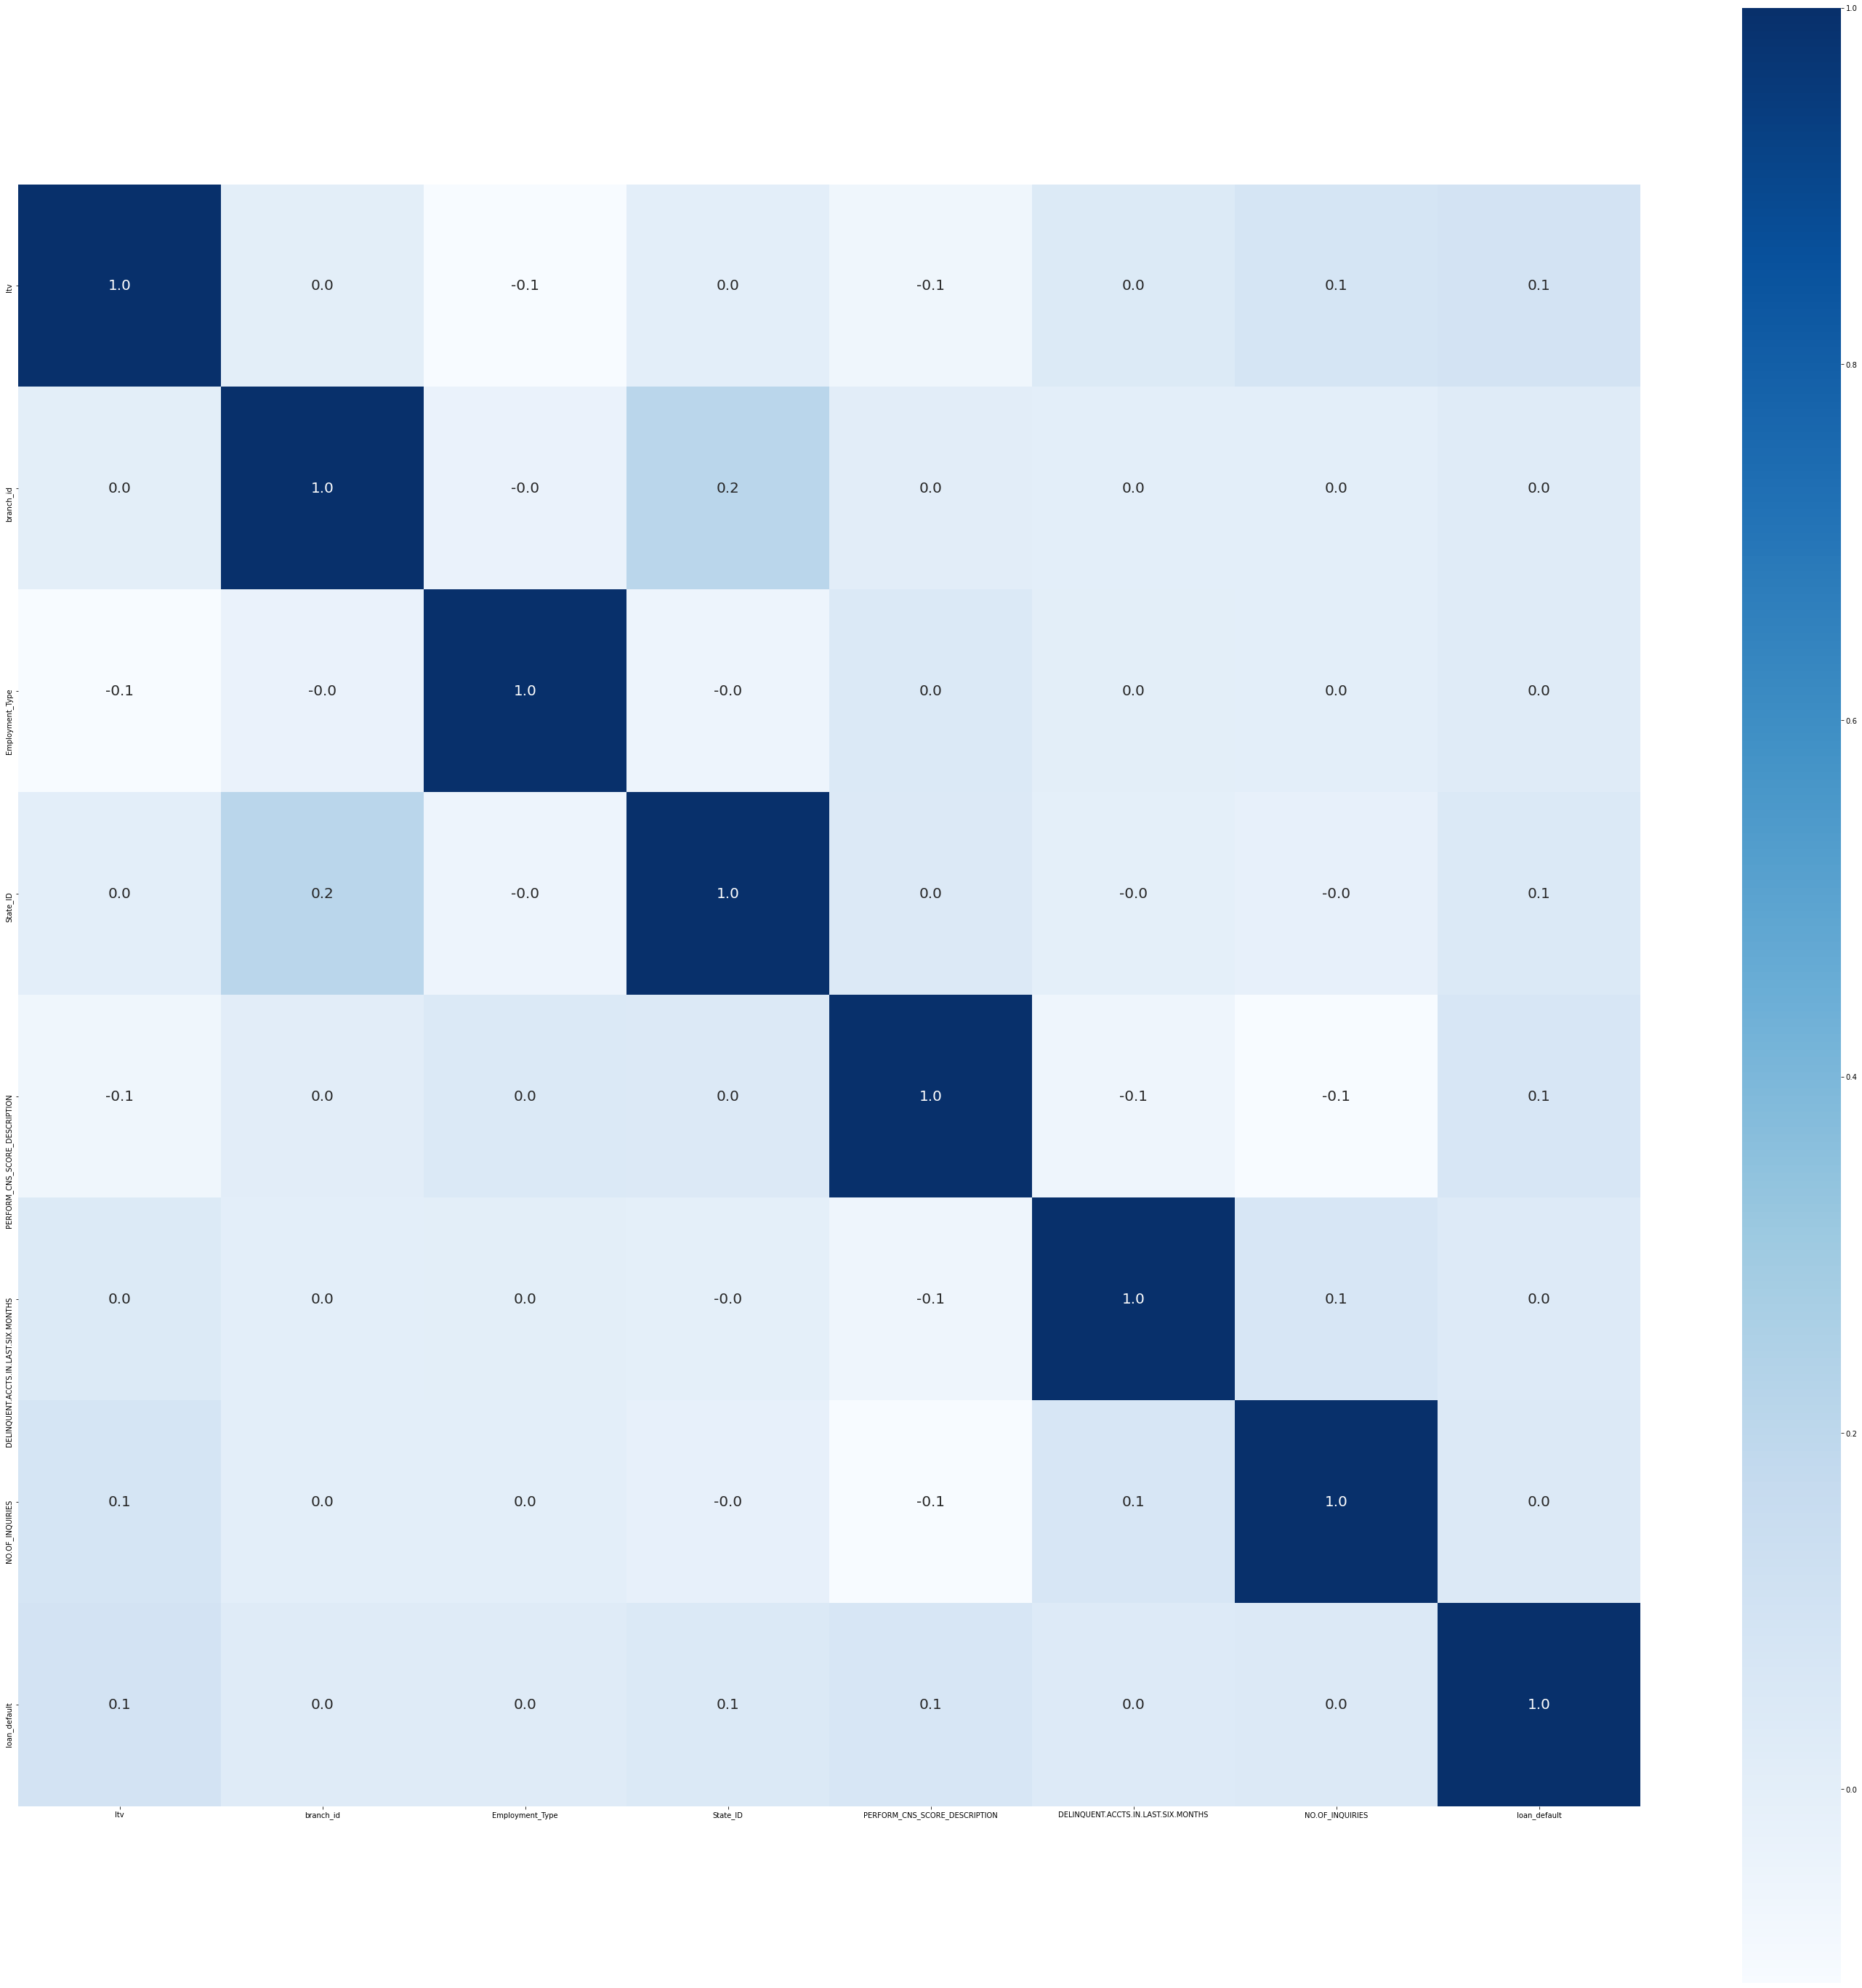

In [8]:
traindatacorr=train_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sb.heatmap(traindatacorr,annot=True,ax=ax,cmap="Blues",annot_kws={"size": 20},fmt=".1f",square=True);

In [9]:
y_dep=train_data.iloc[:,7] #loc can be given
x_ind=train_data.iloc[:,0:7]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=.2,random_state=2)

In [11]:
from sklearn import tree
model_DT=tree.DecisionTreeClassifier(random_state=2)
model_DT_fit=model_DT.fit(x_train,y_train)
y_pred=model_DT_fit.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[32389,  2935],
       [ 8656,  1119]], dtype=int64)

In [12]:
acc=accuracy_score(y_test,y_pred)
acc

0.7429876493935564

In [13]:
model_DTE=tree.DecisionTreeClassifier(random_state=2,criterion='entropy')
model_DT_fit=model_DTE.fit(x_train,y_train)
y_pred=model_DT_fit.predict(x_test)
confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
acc

0.7423667930552784

In [14]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'max_depth':(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}
DT_grid=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=10)

In [15]:
DT_grid.fit(x_train,y_train)
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features='sqrt')

In [16]:
model=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=4)
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[35226,    98],
       [ 9692,    83]], dtype=int64)

In [17]:
acc=accuracy_score(y_test,y_pred)
acc

0.7829220160092242

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=2,n_estimators=200)
model_rf_fit=model_rf.fit(x_train,y_train)
y_pred=model_rf_fit.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[33323,  2001],
       [ 8941,   834]], dtype=int64)

In [20]:
acc=accuracy_score(y_test,y_pred)
acc

0.7573782123772146

In [21]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'n_estimators':(100,200,300,400),'criterion':('gini','entropy'),'max_features':('auto','sqrt'),'min_samples_split':(2,4,6)}
rf_grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)
rf_grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
rf_grid.best_estimator_

In [22]:
best_model=RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=800)
model_fit=best_model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)

In [23]:
confusion_matrix(y_test,y_pred)

array([[34160,  1164],
       [ 9196,   579]], dtype=int64)

In [24]:
acc=accuracy_score(y_test,y_pred)
acc

0.770283154837136